In [4]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import matplotlib.animation as animation
import os
from tqdm import tqdm

In [5]:
U= '5'
A= '80'
S= '40'
T= '50'

Computing global color limits...


100%|██████████| 15/15 [00:49<00:00,  3.29s/it]


Creating animation...


100%|█████████▉| 1499/1500 [56:15<00:02,  2.28s/it] 

Animation saved as 'channel_movie.mp4'


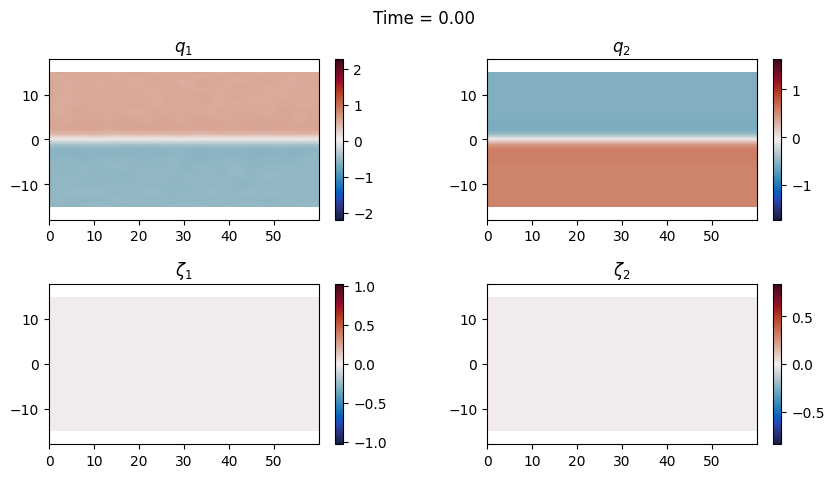

In [3]:
# Define the base path
base_path = '/scratch/ql2221/dedalus_sing/Channel/channel_snap_U' + U + 'A' + A + 'S' + S + 'T' + T + '/'

# Step 1: Compute global min/max for color scales
q1_min, q1_max = np.inf, -np.inf
q2_min, q2_max = np.inf, -np.inf
zeta1_max, zeta2_max = 0, 0

print("Computing global color limits...")
for file_idx in tqdm(range(1, 16)):
    snapname = base_path + f'channel_snap_U{U}A{A}S{S}T{T}_s{file_idx}.h5'
    with h5py.File(snapname, mode='r') as file:
        q1 = np.array(file['tasks']['q1'])
        q2 = np.array(file['tasks']['q2'])
        zeta_1 = np.array(file['tasks']['zeta_1'])
        zeta_2 = np.array(file['tasks']['zeta_2'])

        q1_min = min(q1_min, np.min(q1))
        q1_max = max(q1_max, np.max(q1))
        q2_min = min(q2_min, np.min(q2))
        q2_max = max(q2_max, np.max(q2))
        zeta1_max = max(zeta1_max, np.max(np.abs(zeta_1)))
        zeta2_max = max(zeta2_max, np.max(np.abs(zeta_2)))

# Step 2: Set up the figure
fig = plt.figure(figsize=(10, 5))

def update(frame_idx):
    plt.clf()  # Clear the figure to draw new frame

    file_idx, time_idx = frame_idx
    snapname = base_path + f'channel_snap_U{U}A{A}S{S}T{T}_s{file_idx}.h5'

    with h5py.File(snapname, mode='r') as file:
        q1_data = np.squeeze(np.array(file['tasks']['q1']))
        q2_data = np.squeeze(np.array(file['tasks']['q2']))
        zeta_1_data = np.squeeze(np.array(file['tasks']['zeta_1']))
        zeta_2_data = np.squeeze(np.array(file['tasks']['zeta_2']))
        sim_time_ary = np.array(file['scales']['sim_time'])
        x = np.array(file['scales'][list(file['scales'])[-2]])
        y = np.array(file['scales'][list(file['scales'])[-1]])

    sim_time = sim_time_ary[time_idx]

    fig.suptitle(f'Time = {sim_time:.2f}', y=0.98)

    # Plot q1
    plt.subplot(2, 2, 1)
    plt.pcolormesh(x, y, q1_data[time_idx, :, :].T, cmap=cmo.balance, vmin=q1_min, vmax=q1_max)
    plt.axis('equal')
    plt.colorbar()
    plt.title(r'$q_1$')

    # Plot zeta_1
    plt.subplot(2, 2, 3)
    plt.pcolormesh(x, y, zeta_1_data[time_idx, :, :].T, cmap=cmo.balance, vmin=-zeta1_max, vmax=zeta1_max)
    plt.axis('equal')
    plt.colorbar()
    plt.title(r'$\zeta_1$')

    # Plot q2
    plt.subplot(2, 2, 2)
    plt.pcolormesh(x, y, q2_data[time_idx, :, :].T, cmap=cmo.balance, vmin=q2_min, vmax=q2_max)
    plt.axis('equal')
    plt.colorbar()
    plt.title(r'$q_2$')

    # Plot zeta_2
    plt.subplot(2, 2, 4)
    plt.pcolormesh(x, y, zeta_2_data[time_idx, :, :].T, cmap=cmo.balance, vmin=-zeta2_max, vmax=zeta2_max)
    plt.axis('equal')
    plt.colorbar()
    plt.title(r'$\zeta_2$')

    plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Step 3: Build the list of (file_idx, time_idx) frames
frames = [(file_idx, time_idx) for file_idx in range(1, 16) for time_idx in range(100)]

# Step 4: Create and save animation
print("Creating animation...")
ani = animation.FuncAnimation(fig, update, frames=tqdm(frames), interval=50)
ani.save('channel_movie.mp4', writer='ffmpeg', dpi=200)

print("Animation saved as 'channel_movie.mp4'")

(0.0, 150.0)

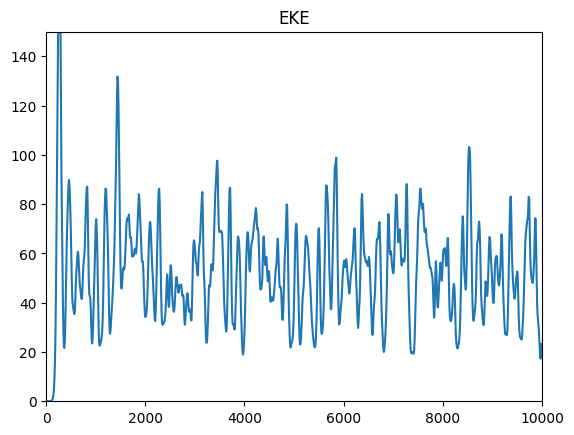

In [25]:
diag_path = '/scratch/ql2221/dedalus_sing/Channel/channel_diag_U' + U + 'A' + A + 'S' + S + 'T' + T + '/channel_diag_U' + U + 'A' + A + 'S' + S + 'T' + T + '_s1.h5'

with h5py.File(diag_path, mode='r') as diag_file:
    EKE1 = np.array(diag_file['tasks']['EKE1'])
    sim_time_ary = np.array(diag_file['scales']['sim_time'])
# Downsample for performance
EKE1 = EKE1[::10]
EKE1 = EKE1 * 1800
sim_time_ary = sim_time_ary[::10]
frame_idx = 1000
plt.plot(sim_time_ary[::10][:frame_idx], EKE1[::10,:,:].ravel()[:frame_idx], label=r"$\langle{\mathrm{EKE}_1}\rangle$")
plt.xlim(0,10000)
plt.ylim(0,150)
plt.title('EKE')
plt.ylim(0,150)


100%|█████████▉| 1499/1500 [1:45:34<00:04,  4.23s/it]

100%|█████████▉| 1499/1500 [02:41<00:00,  9.12it/s]

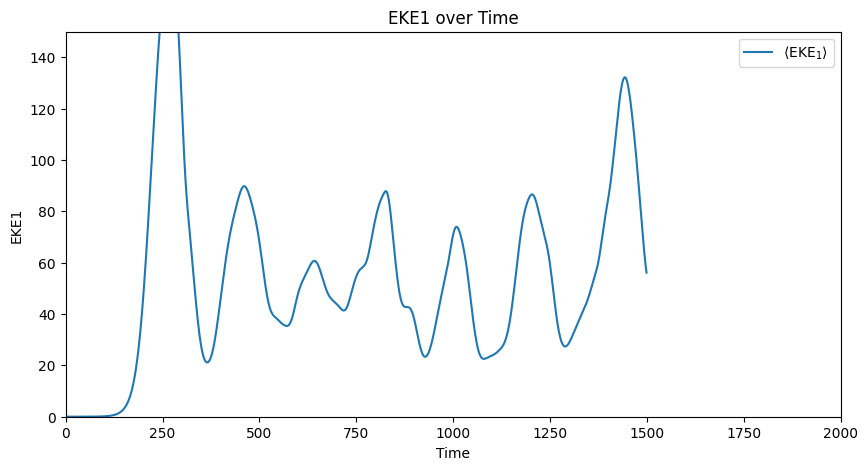

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm

# Load data once
diag_path = '/scratch/ql2221/dedalus_sing/Channel/channel_diag_U' + U + 'A' + A + 'S' + S + 'T' + T + '/channel_diag_U' + U + 'A' + A + 'S' + S + 'T' + T + '_s1.h5'

with h5py.File(diag_path, mode='r') as diag_file:
    EKE1 = np.array(diag_file['tasks']['EKE1']).flatten()
    sim_time_ary = np.array(diag_file['scales']['sim_time']).flatten()

# Downsample for performance
EKE1 = EKE1[::10]
EKE1 = EKE1 * 1800
sim_time_ary = sim_time_ary[::10]

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot([], [], label=r"$\langle{\mathrm{EKE}_1}\rangle$")
ax.set_xlim(0, 2000)
ax.set_ylim(0, 150)
ax.set_xlabel("Time")
ax.set_ylabel("EKE1")
ax.set_title("EKE1 over Time")
ax.legend()

# Update function
def update(frame_idx):
    x = sim_time_ary[:frame_idx + 1]
    y = EKE1[:frame_idx + 1]
    line.set_data(x, y)
    return line,

# Frame indices to animate
frames = list(range(0, 1500, 1))

# Create animation
ani = animation.FuncAnimation(fig, update, frames=tqdm(frames), interval=50, blit=True)

# Save the animation
ani.save('EKE_movie.mp4', writer='ffmpeg', dpi=200)
